<a href="https://colab.research.google.com/github/Fentahun60/Fentahun/blob/main/Numerical_Var__ZambiaCC_BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Path to your .dta file
file_path = '/content/drive/MyDrive/zambia_CC_BC.dta'

# Read the .dta file into a pandas DataFrame
try:
    df = pd.read_stata(file_path)
    print("File imported successfully! First 5 rows:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the path is correct and Google Drive is mounted.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File imported successfully! First 5 rows:
  v000  v001    v005  v007  v012   v025       v106    v151 v152  \
0  ZM8     1  748300  2024    42  urban    primary    male   44   
1  ZM8     1  748300  2024    42  urban     higher  female   41   
2  ZM8     1  748300  2024    24  urban    primary  female   24   
3  ZM8     1  748300  2024    22  urban  secondary    male   26   
4  ZM8     1  748300  2024    32  urban    primary  female   32   

                   v157  ... v481 v484a v484b  \
0            not at all  ...   no    no    no   
1  at least once a week  ...  yes   yes   yes   
2  at least once a week  ...   no    no    no   
3            not at all  ...   no    no    no   
4  at least once a week  ...   no    no   yes   

                                  v501 v525 v763a v763b v763c v781 v836  
0                              married   22    no    no  

In [100]:
# Assuming your dataframe is df

rename_dict = {
    "v012": "respondent_age",
    "v025": "residence_type",
    "v106": "highest_edu_level",
    "v151": "sex_of_household_head",
    "v152": "age_of_household_head",
    "v157": "freq_read_newspaper",
    "v158": "freq_listen_radio",
    "v159": "freq_watch_tv",
    "v169a": "owns_mobile_phone",
    "v190": "wealth_index",
    "v312": "current_contraceptive_method",
    "v394": "visited_health_facility_12mo",
    "v463a": "smokes_cigarettes",
    "v467b": "permission_to_medical_Vist",
    "v467c": "money_needed_for_medical_vist",
    "v467d": "distance_to_health_facility",
    "v467e": "transport_for_medical_visit",
    "v467k": "waiting_time_concern_at_HF",
    "v481": "covered_by_health_insurance",
    "v484a": "breast_exam_by_provider",
    "v484b": "cervical_cancer_tested",
    "v501": "marital_status",
    "v525": "age_at_first_sex",
    "v763a": "STI_last_12mo",
    "v763b": "genital_sore_last_12mo",
    "v763c": "genital_discharge_last_12mo",
    "v781": "ever_tested_hiv",
    "v836": "total_lifetime_sex_partners"
}

# Apply renaming
df = df.rename(columns=rename_dict)

df.head()


,v000,v001,v005,v007,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_read_newspaper,...,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,genital_sore_last_12mo,genital_discharge_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,ZM8,1,748300,2024,42,urban,primary,male,44,not at all,...,no,no,no,married,22,no,no,no,yes,2.0
1,ZM8,1,748300,2024,42,urban,higher,female,41,at least once a week,...,yes,yes,yes,married,17,no,no,no,yes,3.0
2,ZM8,1,748300,2024,24,urban,primary,female,24,at least once a week,...,no,no,no,no longer living together/separated,16,no,yes,yes,yes,3.0
3,ZM8,1,748300,2024,22,urban,secondary,male,26,not at all,...,no,no,no,married,15,yes,no,no,yes,5.0
4,ZM8,1,748300,2024,32,urban,primary,female,32,at least once a week,...,no,no,yes,never in union,15,no,no,no,yes,3.0


In [101]:
df.columns

Index(['v000', 'v001', 'v005', 'v007', 'respondent_age', 'residence_type',
       'highest_edu_level', 'sex_of_household_head', 'age_of_household_head',
       'freq_read_newspaper', 'freq_listen_radio', 'freq_watch_tv',
       'owns_mobile_phone', 'wealth_index', 'current_contraceptive_method',
       'visited_health_facility_12mo', 'smokes_cigarettes',
       'permission_to_medical_Vist', 'money_needed_for_medical_vist',
       'distance_to_health_facility', 'transport_for_medical_visit',
       'waiting_time_concern_at_HF', 'covered_by_health_insurance',
       'breast_exam_by_provider', 'cervical_cancer_tested', 'marital_status',
       'age_at_first_sex', 'STI_last_12mo', 'genital_sore_last_12mo',
       'genital_discharge_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [102]:
df["freq_listen_radio"] = df["freq_listen_radio"].replace({
    "not at all": "No",
    "less than once a week": "No",
    "at least once a week": "Yes",
    "almost every day": "Yes"})

/tmp/ipython-input-2432297828.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["freq_listen_radio"] = df["freq_listen_radio"].replace({


In [103]:
df["freq_watch_tv"] = df["freq_watch_tv"].replace({
    "not at all": "No",
    "less than once a week": "No",
    "at least once a week": "Yes",
    "almost every day": "Yes"})

/tmp/ipython-input-3206452986.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["freq_watch_tv"] = df["freq_watch_tv"].replace({


In [104]:
df["current_contraceptive_method"] = df["current_contraceptive_method"].replace({

    # Hormonal
    "pill": "Hormonal",
    "injections": "Hormonal",
    "implants/norplant": "Hormonal",
    "emergency contraception": "Hormonal",
    "lactational amenorrhea (lam)": "Hormonal",

    # Non-hormonal
    "not using": "Non-Hormonal",
    "iud": "Non-Hormonal",
    "male condom": "Non-Hormonal",
    "female condom": "Non-Hormonal",
    "female sterilization": "Non-Hormonal",
    "periodic abstinence": "Non-Hormonal",
    "withdrawal": "Non-Hormonal",
    "other traditional": "Non-Hormonal",
    "other modern method": "Non-Hormonal",
    "standard days method (sdm)": "Non-Hormonal"
})


/tmp/ipython-input-214665719.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["current_contraceptive_method"] = df["current_contraceptive_method"].replace({


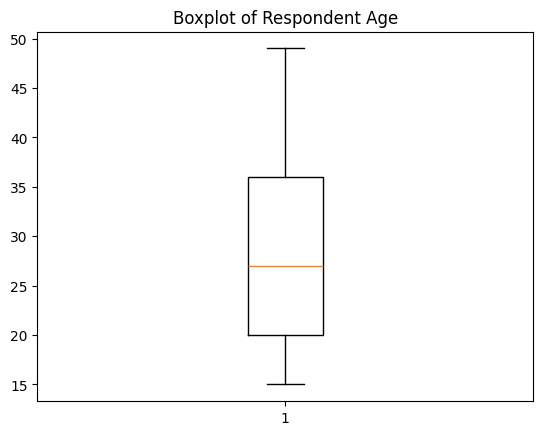

In [105]:
import matplotlib.pyplot as plt

plt.boxplot(df['respondent_age'])
plt.title("Boxplot of Respondent Age")
plt.show()


In [106]:
# Min-Max Normalization
df['respondent_age'] = (df['respondent_age'] - df['respondent_age'].min()) / \
                                  (df['respondent_age'].max() - df['respondent_age'].min())

# Display first few rows to check
print(df[['respondent_age', 'respondent_age']].head())


   respondent_age  respondent_age
0        0.794118        0.794118
1        0.794118        0.794118
2        0.264706        0.264706
3        0.205882        0.205882
4        0.500000        0.500000


In [107]:
import pandas as pd
import numpy as np

# Example: your dataframe is df and the column is 'age_at_first_sex'

def recategorize_age(x):
    # Handle non-numeric values first
    if pd.isna(x):
        return np.nan
    if isinstance(x, str) and x.lower() == "not had sex":
        return "not had sex"

    # Convert to numeric if it's a string number
    try:
        x = float(x)
    except:
        return np.nan

    # Categorize
    if x < 15:
        return "<15"
    elif 15 <= x <= 17:
        return "15-17"
    elif 18 <= x <= 19:
        return "18-19"
    elif x >= 20:
        return ">20"
    else:
        return np.nan

# Apply to dataframe
df["age_at_first_sex"] = df["age_at_first_sex"].apply(recategorize_age)

# View result
df["age_at_first_sex"].value_counts(dropna=False)


,count
age_at_first_sex,
15-17,6497
<15,2392
18-19,2105
not had sex,1707
>20,1250


In [108]:
df['total_lifetime_sex_partners'].dtype
df['total_lifetime_sex_partners'].unique()  # see if there are unexpected strings


[2.0, 3.0, 5.0, 4.0, NaN, ..., 25.0, 35.0, 27.0, 50.0, 29.0]
Length: 29
Categories (28, object): [1.0 < 2.0 < 3.0 < 4.0 ... 47.0 < 50.0 < '95+' < 'don't know']

/tmp/ipython-input-1611095577.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['total_lifetime_sex_partners'] = df['total_lifetime_sex_partners'].replace({
/tmp/ipython-input-1611095577.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['total_lifetime_sex_partners'] = df['total_lifetime_sex_partners'].replace({


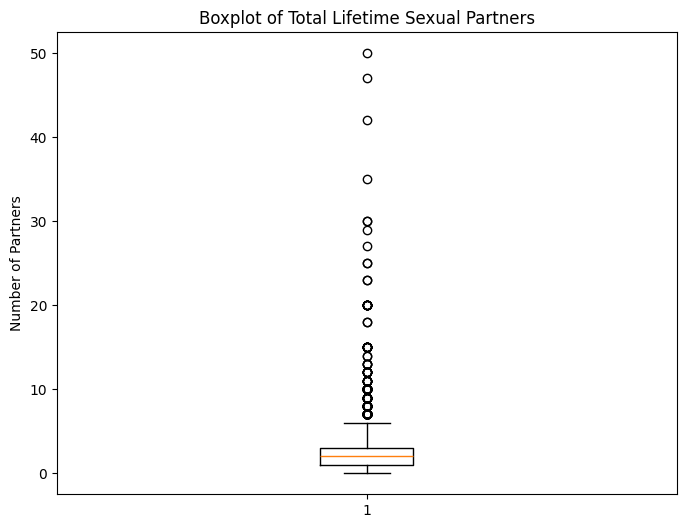

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace specific strings with 0
df['total_lifetime_sex_partners'] = df['total_lifetime_sex_partners'].replace({
    '95+': 0,
    "don't know": 0
})

# Convert the column to numeric (coerce any other invalid entries to 0)
df['total_lifetime_sex_partners'] = pd.to_numeric(
    df['total_lifetime_sex_partners'], errors='coerce'
).fillna(0)

# Plot the boxplot
plt.figure(figsize=(8,6))
plt.boxplot(df['total_lifetime_sex_partners'])
plt.title("Boxplot of Total Lifetime Sexual Partners")
plt.ylabel("Number of Partners")
plt.show()


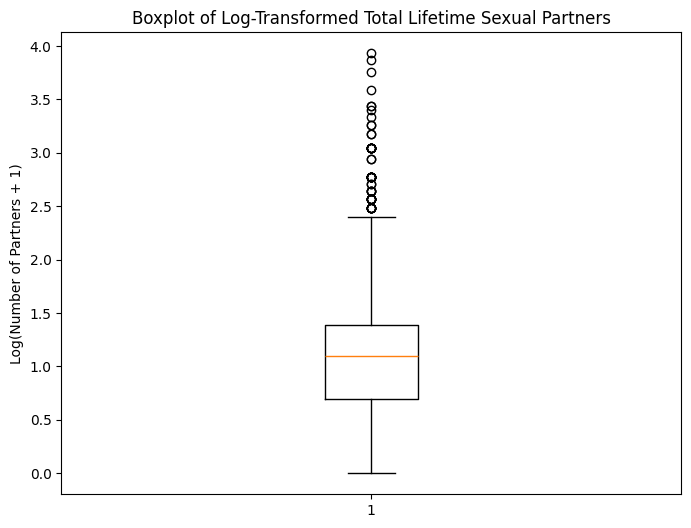

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Replace specific strings with 0
df['total_lifetime_sex_partners'] = df['total_lifetime_sex_partners'].replace({
    '95+': 0,
    "don't know": 0
})

# Convert the column to numeric (coerce any other invalid entries to 0)
df['total_lifetime_sex_partners'] = pd.to_numeric(
    df['total_lifetime_sex_partners'], errors='coerce'
).fillna(0)

# Apply log transformation (log(x + 1) to handle zeros)
df['total_lifetime_sex_partners'] = np.log1p(df['total_lifetime_sex_partners'])

# Plot the boxplot of log-transformed data
plt.figure(figsize=(8,6))
plt.boxplot(df['total_lifetime_sex_partners'])
plt.title("Boxplot of Log-Transformed Total Lifetime Sexual Partners")
plt.ylabel("Log(Number of Partners + 1)")
plt.show()


In [111]:
missing_percentages = df.isnull().sum() / len(df) * 100
missing_percentages_df = pd.DataFrame({"Missing Percentage": missing_percentages})

print("Percentage of missing values for each variable:")
print(missing_percentages_df)

Percentage of missing values for each variable:
                               Missing Percentage
v000                                          0.0
v001                                          0.0
v005                                          0.0
v007                                          0.0
respondent_age                                0.0
residence_type                                0.0
highest_edu_level                             0.0
sex_of_household_head                         0.0
age_of_household_head                         0.0
freq_read_newspaper                           0.0
freq_listen_radio                             0.0
freq_watch_tv                                 0.0
owns_mobile_phone                             0.0
wealth_index                                  0.0
current_contraceptive_method                  0.0
visited_health_facility_12mo                  0.0
smokes_cigarettes                             0.0
permission_to_medical_Vist                    0.0
mo

In [112]:
df.head()

,v000,v001,v005,v007,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_read_newspaper,...,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,genital_sore_last_12mo,genital_discharge_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,ZM8,1,748300,2024,0.794118,urban,primary,male,44,not at all,...,no,no,no,married,>20,no,no,no,yes,1.098612
1,ZM8,1,748300,2024,0.794118,urban,higher,female,41,at least once a week,...,yes,yes,yes,married,15-17,no,no,no,yes,1.386294
2,ZM8,1,748300,2024,0.264706,urban,primary,female,24,at least once a week,...,no,no,no,no longer living together/separated,15-17,no,yes,yes,yes,1.386294
3,ZM8,1,748300,2024,0.205882,urban,secondary,male,26,not at all,...,no,no,no,married,15-17,yes,no,no,yes,1.791759
4,ZM8,1,748300,2024,0.500000,urban,primary,female,32,at least once a week,...,no,no,yes,never in union,15-17,no,no,no,yes,1.386294


In [113]:
df = df.drop('freq_read_newspaper', axis=1)

In [114]:
df.columns

Index(['v000', 'v001', 'v005', 'v007', 'respondent_age', 'residence_type',
       'highest_edu_level', 'sex_of_household_head', 'age_of_household_head',
       'freq_listen_radio', 'freq_watch_tv', 'owns_mobile_phone',
       'wealth_index', 'current_contraceptive_method',
       'visited_health_facility_12mo', 'smokes_cigarettes',
       'permission_to_medical_Vist', 'money_needed_for_medical_vist',
       'distance_to_health_facility', 'transport_for_medical_visit',
       'waiting_time_concern_at_HF', 'covered_by_health_insurance',
       'breast_exam_by_provider', 'cervical_cancer_tested', 'marital_status',
       'age_at_first_sex', 'STI_last_12mo', 'genital_sore_last_12mo',
       'genital_discharge_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [115]:
df.head()

,v000,v001,v005,v007,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_listen_radio,...,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,genital_sore_last_12mo,genital_discharge_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,ZM8,1,748300,2024,0.794118,urban,primary,male,44,No,...,no,no,no,married,>20,no,no,no,yes,1.098612
1,ZM8,1,748300,2024,0.794118,urban,higher,female,41,Yes,...,yes,yes,yes,married,15-17,no,no,no,yes,1.386294
2,ZM8,1,748300,2024,0.264706,urban,primary,female,24,No,...,no,no,no,no longer living together/separated,15-17,no,yes,yes,yes,1.386294
3,ZM8,1,748300,2024,0.205882,urban,secondary,male,26,No,...,no,no,no,married,15-17,yes,no,no,yes,1.791759
4,ZM8,1,748300,2024,0.500000,urban,primary,female,32,No,...,no,no,yes,never in union,15-17,no,no,no,yes,1.386294


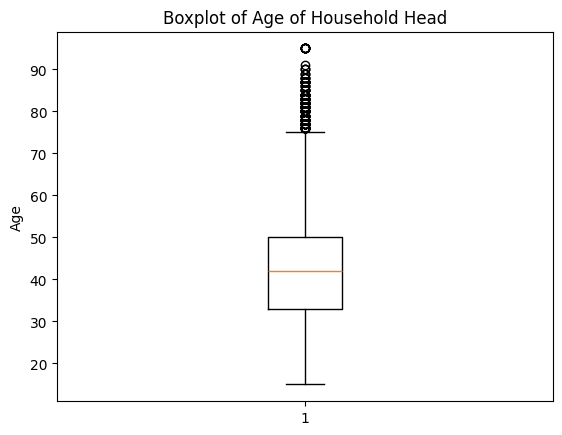

In [116]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to numeric, invalid entries become NaN
df['age_of_household_head'] = pd.to_numeric(df['age_of_household_head'], errors='coerce')

# Drop NaN values for plotting
ages = df['age_of_household_head'].dropna()

# Plot boxplot
plt.boxplot(ages)
plt.title("Boxplot of Age of Household Head")
plt.ylabel("Age")
plt.show()


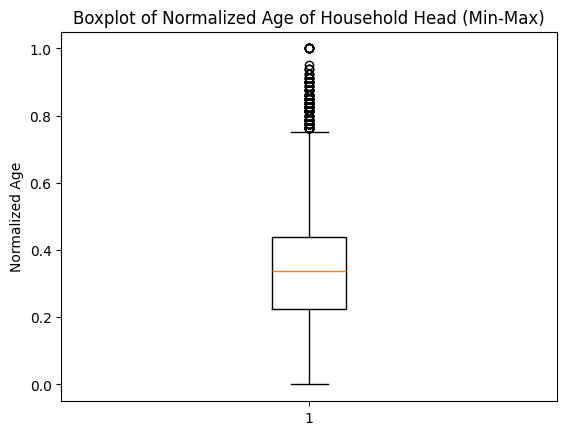

In [117]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to numeric, invalid entries become NaN
df['age_of_household_head'] = pd.to_numeric(df['age_of_household_head'], errors='coerce')

# Drop NaN values temporarily to compute min and max
ages = df['age_of_household_head'].dropna()

# Min-Max normalization
ages_normalized = (ages - ages.min()) / (ages.max() - ages.min())

# Replace the existing column with normalized values
df.loc[ages_normalized.index, 'age_of_household_head'] = ages_normalized

# Plot boxplot of normalized values
plt.boxplot(df['age_of_household_head'].dropna())
plt.title("Boxplot of Normalized Age of Household Head (Min-Max)")
plt.ylabel("Normalized Age")
plt.show()



In [118]:
df.head()

,v000,v001,v005,v007,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_listen_radio,...,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,genital_sore_last_12mo,genital_discharge_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,ZM8,1,748300,2024,0.794118,urban,primary,male,0.3625,No,...,no,no,no,married,>20,no,no,no,yes,1.098612
1,ZM8,1,748300,2024,0.794118,urban,higher,female,0.3250,Yes,...,yes,yes,yes,married,15-17,no,no,no,yes,1.386294
2,ZM8,1,748300,2024,0.264706,urban,primary,female,0.1125,No,...,no,no,no,no longer living together/separated,15-17,no,yes,yes,yes,1.386294
3,ZM8,1,748300,2024,0.205882,urban,secondary,male,0.1375,No,...,no,no,no,married,15-17,yes,no,no,yes,1.791759
4,ZM8,1,748300,2024,0.500000,urban,primary,female,0.2125,No,...,no,no,yes,never in union,15-17,no,no,no,yes,1.386294


In [119]:
print(df['marital_status'].value_counts(dropna=False))

marital_status
married                                7358
never in union                         4628
divorced                               1050
no longer living together/separated     453
widowed                                 363
living with partner                      99
Name: count, dtype: int64


In [120]:
df['marital_status'] = df['marital_status'].replace({
    'married': 'Married',
    'never in union': 'Single',
    'divorced': 'Divorced',
    'no longer living together/separated': 'Separated',
    'widowed': 'Widowed',
    'living with partner': 'Living with partner'
})

print("Value counts for 'marital_status' after renaming:")
print(df['marital_status'].value_counts(dropna=False))

Value counts for 'marital_status' after renaming:
marital_status
Married                7358
Single                 4628
Divorced               1050
Separated               453
Widowed                 363
Living with partner      99
Name: count, dtype: int64


/tmp/ipython-input-4107072191.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['marital_status'] = df['marital_status'].replace({


In [121]:
df.columns

Index(['v000', 'v001', 'v005', 'v007', 'respondent_age', 'residence_type',
       'highest_edu_level', 'sex_of_household_head', 'age_of_household_head',
       'freq_listen_radio', 'freq_watch_tv', 'owns_mobile_phone',
       'wealth_index', 'current_contraceptive_method',
       'visited_health_facility_12mo', 'smokes_cigarettes',
       'permission_to_medical_Vist', 'money_needed_for_medical_vist',
       'distance_to_health_facility', 'transport_for_medical_visit',
       'waiting_time_concern_at_HF', 'covered_by_health_insurance',
       'breast_exam_by_provider', 'cervical_cancer_tested', 'marital_status',
       'age_at_first_sex', 'STI_last_12mo', 'genital_sore_last_12mo',
       'genital_discharge_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [122]:
selected_columns = [
    'respondent_age', 'residence_type',
     'highest_edu_level', 'sex_of_household_head', 'age_of_household_head',
       'freq_listen_radio', 'freq_watch_tv', 'owns_mobile_phone',
       'wealth_index', 'current_contraceptive_method',
       'visited_health_facility_12mo', 'smokes_cigarettes',
       'permission_to_medical_Vist', 'money_needed_for_medical_vist',
       'distance_to_health_facility', 'transport_for_medical_visit',
       'waiting_time_concern_at_HF', 'covered_by_health_insurance',
       'breast_exam_by_provider', 'cervical_cancer_tested', 'marital_status',
       'age_at_first_sex', 'STI_last_12mo', 'genital_sore_last_12mo',
       'genital_discharge_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'
]

df_selected = df[selected_columns]
display(df_selected.head())

,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_listen_radio,freq_watch_tv,owns_mobile_phone,wealth_index,current_contraceptive_method,...,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,genital_sore_last_12mo,genital_discharge_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,0.794118,urban,primary,male,0.3625,No,No,yes,richer,Non-Hormonal,...,no,no,no,Married,>20,no,no,no,yes,1.098612
1,0.794118,urban,higher,female,0.3250,Yes,Yes,yes,richest,Non-Hormonal,...,yes,yes,yes,Married,15-17,no,no,no,yes,1.386294
2,0.264706,urban,primary,female,0.1125,No,No,yes,richer,Hormonal,...,no,no,no,Separated,15-17,no,yes,yes,yes,1.386294
3,0.205882,urban,secondary,male,0.1375,No,No,yes,middle,Hormonal,...,no,no,no,Married,15-17,yes,no,no,yes,1.791759
4,0.500000,urban,primary,female,0.2125,No,No,yes,poorer,Hormonal,...,no,no,yes,Single,15-17,no,no,no,yes,1.386294


In [123]:
df_selected.columns

Index(['respondent_age', 'residence_type', 'highest_edu_level',
       'sex_of_household_head', 'age_of_household_head', 'freq_listen_radio',
       'freq_watch_tv', 'owns_mobile_phone', 'wealth_index',
       'current_contraceptive_method', 'visited_health_facility_12mo',
       'smokes_cigarettes', 'permission_to_medical_Vist',
       'money_needed_for_medical_vist', 'distance_to_health_facility',
       'transport_for_medical_visit', 'waiting_time_concern_at_HF',
       'covered_by_health_insurance', 'breast_exam_by_provider',
       'cervical_cancer_tested', 'marital_status', 'age_at_first_sex',
       'STI_last_12mo', 'genital_sore_last_12mo',
       'genital_discharge_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [124]:
df_selected = df_selected[df_selected['cervical_cancer_tested'] != 'don\'t know']
print("Rows with 'don't know' in 'cervical_cancer_tested' have been removed.")
print(f"New shape of DataFrame: {df_selected.shape}")

Rows with 'don't know' in 'cervical_cancer_tested' have been removed.
New shape of DataFrame: (13909, 27)


In [125]:
df_selected.columns

Index(['respondent_age', 'residence_type', 'highest_edu_level',
       'sex_of_household_head', 'age_of_household_head', 'freq_listen_radio',
       'freq_watch_tv', 'owns_mobile_phone', 'wealth_index',
       'current_contraceptive_method', 'visited_health_facility_12mo',
       'smokes_cigarettes', 'permission_to_medical_Vist',
       'money_needed_for_medical_vist', 'distance_to_health_facility',
       'transport_for_medical_visit', 'waiting_time_concern_at_HF',
       'covered_by_health_insurance', 'breast_exam_by_provider',
       'cervical_cancer_tested', 'marital_status', 'age_at_first_sex',
       'STI_last_12mo', 'genital_sore_last_12mo',
       'genital_discharge_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [126]:
df_selected = df_selected.drop(['genital_sore_last_12mo', 'genital_discharge_last_12mo', 'permission_to_medical_Vist', 'transport_for_medical_visit', 'money_needed_for_medical_vist'], axis=1)

In [127]:
df_selected.shape

(13909, 22)

In [128]:
df_selected.head()

,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_listen_radio,freq_watch_tv,owns_mobile_phone,wealth_index,current_contraceptive_method,...,distance_to_health_facility,waiting_time_concern_at_HF,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,0.794118,urban,primary,male,0.3625,No,No,yes,richer,Non-Hormonal,...,not a big problem,not a big problem,no,no,no,Married,>20,no,yes,1.098612
1,0.794118,urban,higher,female,0.3250,Yes,Yes,yes,richest,Non-Hormonal,...,not a big problem,not a big problem,yes,yes,yes,Married,15-17,no,yes,1.386294
2,0.264706,urban,primary,female,0.1125,No,No,yes,richer,Hormonal,...,not a big problem,not a big problem,no,no,no,Separated,15-17,no,yes,1.386294
3,0.205882,urban,secondary,male,0.1375,No,No,yes,middle,Hormonal,...,not a big problem,not a big problem,no,no,no,Married,15-17,yes,yes,1.791759
4,0.500000,urban,primary,female,0.2125,No,No,yes,poorer,Hormonal,...,not a big problem,not a big problem,no,no,yes,Single,15-17,no,yes,1.386294


In [129]:
for column in df_selected.columns:
    print(f"\nCategories in '{column}':")
    print(df_selected[column].unique())



Categories in 'respondent_age':
[0.79411765 0.26470588 0.20588235 0.5        0.61764706 0.32352941
 0.23529412 0.41176471 1.         0.11764706 0.05882353 0.97058824
 0.85294118 0.14705882 0.88235294 0.52941176 0.67647059 0.91176471
 0.02941176 0.08823529 0.55882353 0.82352941 0.17647059 0.76470588
 0.64705882 0.29411765 0.44117647 0.73529412 0.94117647 0.38235294
 0.35294118 0.47058824 0.         0.70588235 0.58823529]

Categories in 'residence_type':
['urban', 'rural']
Categories (2, object): ['urban' < 'rural']

Categories in 'highest_edu_level':
['primary', 'higher', 'secondary', 'no education']
Categories (4, object): ['no education' < 'primary' < 'secondary' < 'higher']

Categories in 'sex_of_household_head':
['male', 'female']
Categories (2, object): ['male' < 'female']

Categories in 'age_of_household_head':
[0.3625 0.325  0.1125 0.1375 0.2125 0.2625 0.1    0.1875 0.55   0.3125
 0.475  0.6875 0.45   0.375  0.225  0.3875 0.6    0.625  0.275  0.125
 0.4625 0.0625 0.2375 0.0875 0

In [130]:
import pandas as pd
import numpy as np

# Replace "don't know" with NaN
df_selected = df_selected.replace("don't know", np.nan)

# Mode imputation for each column
for column in df_selected.columns:
    if df_selected[column].isnull().any():
        mode_value = df_selected[column].mode(dropna=True)[0]  # Get the most frequent value
        # Fix: Avoid inplace=True on a potentially read-only view by reassigning
        df_selected[column] = df_selected[column].fillna(mode_value)

# Optional: check the updated dataframe
print(df_selected.head())

/tmp/ipython-input-1559744888.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_selected = df_selected.replace("don't know", np.nan)


   respondent_age residence_type highest_edu_level sex_of_household_head  \
0        0.794118          urban           primary                  male   
1        0.794118          urban            higher                female   
2        0.264706          urban           primary                female   
3        0.205882          urban         secondary                  male   
4        0.500000          urban           primary                female   

   age_of_household_head freq_listen_radio freq_watch_tv owns_mobile_phone  \
0                 0.3625                No            No               yes   
1                 0.3250               Yes           Yes               yes   
2                 0.1125                No            No               yes   
3                 0.1375                No            No               yes   
4                 0.2125                No            No               yes   

  wealth_index current_contraceptive_method  ... distance_to_health_facili

In [131]:
for column in df_selected.columns:
    print(f"\nCategories in '{column}':")
    print(df_selected[column].unique())


Categories in 'respondent_age':
[0.79411765 0.26470588 0.20588235 0.5        0.61764706 0.32352941
 0.23529412 0.41176471 1.         0.11764706 0.05882353 0.97058824
 0.85294118 0.14705882 0.88235294 0.52941176 0.67647059 0.91176471
 0.02941176 0.08823529 0.55882353 0.82352941 0.17647059 0.76470588
 0.64705882 0.29411765 0.44117647 0.73529412 0.94117647 0.38235294
 0.35294118 0.47058824 0.         0.70588235 0.58823529]

Categories in 'residence_type':
['urban', 'rural']
Categories (2, object): ['urban' < 'rural']

Categories in 'highest_edu_level':
['primary', 'higher', 'secondary', 'no education']
Categories (4, object): ['no education' < 'primary' < 'secondary' < 'higher']

Categories in 'sex_of_household_head':
['male', 'female']
Categories (2, object): ['male' < 'female']

Categories in 'age_of_household_head':
[0.3625 0.325  0.1125 0.1375 0.2125 0.2625 0.1    0.1875 0.55   0.3125
 0.475  0.6875 0.45   0.375  0.225  0.3875 0.6    0.625  0.275  0.125
 0.4625 0.0625 0.2375 0.0875 0

In [132]:
df_selected.shape

(13909, 22)

In [133]:
df_selected.dtypes

,0
respondent_age,float64
residence_type,category
highest_edu_level,category
sex_of_household_head,category
age_of_household_head,float64
freq_listen_radio,category
freq_watch_tv,category
owns_mobile_phone,category
wealth_index,category
current_contraceptive_method,category


In [134]:
df_selected.columns

Index(['respondent_age', 'residence_type', 'highest_edu_level',
       'sex_of_household_head', 'age_of_household_head', 'freq_listen_radio',
       'freq_watch_tv', 'owns_mobile_phone', 'wealth_index',
       'current_contraceptive_method', 'visited_health_facility_12mo',
       'smokes_cigarettes', 'distance_to_health_facility',
       'waiting_time_concern_at_HF', 'covered_by_health_insurance',
       'breast_exam_by_provider', 'cervical_cancer_tested', 'marital_status',
       'age_at_first_sex', 'STI_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [135]:
for column in df_selected.columns:
    print(f"\nCategories in '{column}':")
    print(df_selected[column].unique())


Categories in 'respondent_age':
[0.79411765 0.26470588 0.20588235 0.5        0.61764706 0.32352941
 0.23529412 0.41176471 1.         0.11764706 0.05882353 0.97058824
 0.85294118 0.14705882 0.88235294 0.52941176 0.67647059 0.91176471
 0.02941176 0.08823529 0.55882353 0.82352941 0.17647059 0.76470588
 0.64705882 0.29411765 0.44117647 0.73529412 0.94117647 0.38235294
 0.35294118 0.47058824 0.         0.70588235 0.58823529]

Categories in 'residence_type':
['urban', 'rural']
Categories (2, object): ['urban' < 'rural']

Categories in 'highest_edu_level':
['primary', 'higher', 'secondary', 'no education']
Categories (4, object): ['no education' < 'primary' < 'secondary' < 'higher']

Categories in 'sex_of_household_head':
['male', 'female']
Categories (2, object): ['male' < 'female']

Categories in 'age_of_household_head':
[0.3625 0.325  0.1125 0.1375 0.2125 0.2625 0.1    0.1875 0.55   0.3125
 0.475  0.6875 0.45   0.375  0.225  0.3875 0.6    0.625  0.275  0.125
 0.4625 0.0625 0.2375 0.0875 0

In [136]:
encoding_maps = {
    'residence_type': {'urban': 0, 'rural': 1},
    'highest_edu_level': {'no education': 0, 'primary': 1, 'secondary': 2, 'higher': 3},
    'sex_of_household_head': {'female': 0, 'male': 1},
    'freq_listen_radio': {'no': 0, 'yes': 1},
    'freq_watch_tv': {'no': 0, 'yes': 1},
    'owns_mobile_phone': {'no': 0, 'yes': 1},
    'wealth_index': {'poorest': 1, 'poorer': 2, 'middle': 3, 'richer': 4, 'richest': 5},
    'current_contraceptive_method': {'non-hormonal': 0, 'hormonal': 1},
    'visited_health_facility_12mo': {'no': 0, 'yes': 1},
    'smokes_cigarettes': {'no': 0, 'yes': 1},
    'distance_to_health_facility': {'not a big problem': 0, 'big problem': 1},
    'waiting_time_concern_at_HF': {'not a big problem': 0, 'big problem': 1},
    'covered_by_health_insurance': {'no': 0, 'yes': 1},
    'breast_exam_by_provider': {'no': 0, 'yes': 1},
    'cervical_cancer_tested': {'no': 0, 'yes': 1},
    'marital_status': {
        'single': 1, 'living with partner': 2, 'married': 3,
        'separated': 4, 'divorced': 5, 'widowed': 6
    },
    'age_at_first_sex': {'not had sex':1,'<15': 2, '15-17': 3, '18-19': 5, '>20': 5},
    'STI_last_12mo': {'no': 0, 'yes': 1},
    'ever_tested_hiv': {'no': 0, 'yes': 1},
    }

for col, mapping in encoding_maps.items():
    df_selected[col] = df_selected[col].map(mapping)


In [137]:
df_selected.head()

,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_listen_radio,freq_watch_tv,owns_mobile_phone,wealth_index,current_contraceptive_method,...,distance_to_health_facility,waiting_time_concern_at_HF,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,0.794118,0,1,1,0.3625,NaN,NaN,1,4,NaN,...,0,0,0,0,0,NaN,5,0,1,1.098612
1,0.794118,0,3,0,0.3250,NaN,NaN,1,5,NaN,...,0,0,1,1,1,NaN,3,0,1,1.386294
2,0.264706,0,1,0,0.1125,NaN,NaN,1,4,NaN,...,0,0,0,0,0,NaN,3,0,1,1.386294
3,0.205882,0,2,1,0.1375,NaN,NaN,1,3,NaN,...,0,0,0,0,0,NaN,3,1,1,1.791759
4,0.500000,0,1,0,0.2125,NaN,NaN,1,2,NaN,...,0,0,0,0,1,NaN,3,0,1,1.386294


In [138]:
df_selected.columns

Index(['respondent_age', 'residence_type', 'highest_edu_level',
       'sex_of_household_head', 'age_of_household_head', 'freq_listen_radio',
       'freq_watch_tv', 'owns_mobile_phone', 'wealth_index',
       'current_contraceptive_method', 'visited_health_facility_12mo',
       'smokes_cigarettes', 'distance_to_health_facility',
       'waiting_time_concern_at_HF', 'covered_by_health_insurance',
       'breast_exam_by_provider', 'cervical_cancer_tested', 'marital_status',
       'age_at_first_sex', 'STI_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [139]:
rename_map = {
    'respondent_age': 'age',
    'residence_type': 'residence',
    'highest_edu_level': 'education_level',
    'sex_of_household_head': 'household_head_sex',
    'age_of_household_head': 'household_head_age',
    'freq_listen_radio': 'listen_radio',
    'freq_watch_tv': 'watch_tv',
    'owns_mobile_phone': 'mobile_phone',
    'wealth_index': 'wealth_index',
    'current_contraceptive_method': 'contraceptive_method',
    'visited_health_facility_12mo': 'visited_health_facility_12mo',
    'smokes_cigarettes': 'smokes_cigarettes',
    'distance_to_health_facility': 'distance_to_Helth_facility',
    'waiting_time_concern_at_HF': 'facility_waiting_time',
    'covered_by_health_insurance': 'health_insurance',
    'breast_exam_by_provider': 'breast_exam',
    'cervical_cancer_tested': 'cervical_cancer_screened',
    'marital_status': 'marital_status',
    'age_at_first_sex': 'age_first_sex',
    'STI_last_12mo': 'STI_last12mo',
    'ever_tested_hiv': 'ever_tested_hiv',
    'total_lifetime_sex_partners': 'lifetime_sex_partners'
}

df_selected = df_selected.rename(columns=rename_map)


In [140]:
df_selected.head()

,age,residence,education_level,household_head_sex,household_head_age,listen_radio,watch_tv,mobile_phone,wealth_index,contraceptive_method,...,distance_to_Helth_facility,facility_waiting_time,health_insurance,breast_exam,cervical_cancer_screened,marital_status,age_first_sex,STI_last12mo,ever_tested_hiv,lifetime_sex_partners
0,0.794118,0,1,1,0.3625,NaN,NaN,1,4,NaN,...,0,0,0,0,0,NaN,5,0,1,1.098612
1,0.794118,0,3,0,0.3250,NaN,NaN,1,5,NaN,...,0,0,1,1,1,NaN,3,0,1,1.386294
2,0.264706,0,1,0,0.1125,NaN,NaN,1,4,NaN,...,0,0,0,0,0,NaN,3,0,1,1.386294
3,0.205882,0,2,1,0.1375,NaN,NaN,1,3,NaN,...,0,0,0,0,0,NaN,3,1,1,1.791759
4,0.500000,0,1,0,0.2125,NaN,NaN,1,2,NaN,...,0,0,0,0,1,NaN,3,0,1,1.386294


In [141]:
df_selected.columns

Index(['age', 'residence', 'education_level', 'household_head_sex',
       'household_head_age', 'listen_radio', 'watch_tv', 'mobile_phone',
       'wealth_index', 'contraceptive_method', 'visited_health_facility_12mo',
       'smokes_cigarettes', 'distance_to_Helth_facility',
       'facility_waiting_time', 'health_insurance', 'breast_exam',
       'cervical_cancer_screened', 'marital_status', 'age_first_sex',
       'STI_last12mo', 'ever_tested_hiv', 'lifetime_sex_partners'],
      dtype='object')

In [142]:
# --- Define target and features ---
y = df_selected["cervical_cancer_screened"]
X = df_selected.drop(columns=["cervical_cancer_screened"])

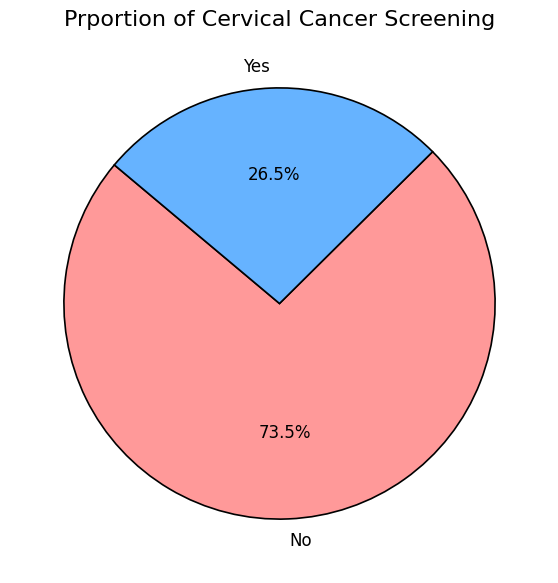

In [143]:
import matplotlib.pyplot as plt

# Map 0/1 to No/Yes
y_mapped = df_selected["cervical_cancer_screened"].map({0: "No", 1: "Yes"})

# Calculate counts
counts = y_mapped.value_counts()
labels = counts.index
sizes = counts.values
colors = ['#ff9999','#66b3ff']  # Nice color palette

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Show percentage
    startangle=140,     # Rotation
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2},  # Black border for wedges
    textprops={'fontsize': 12}
)
plt.title("Prportion of Cervical Cancer Screening", fontsize=16)
plt.show()


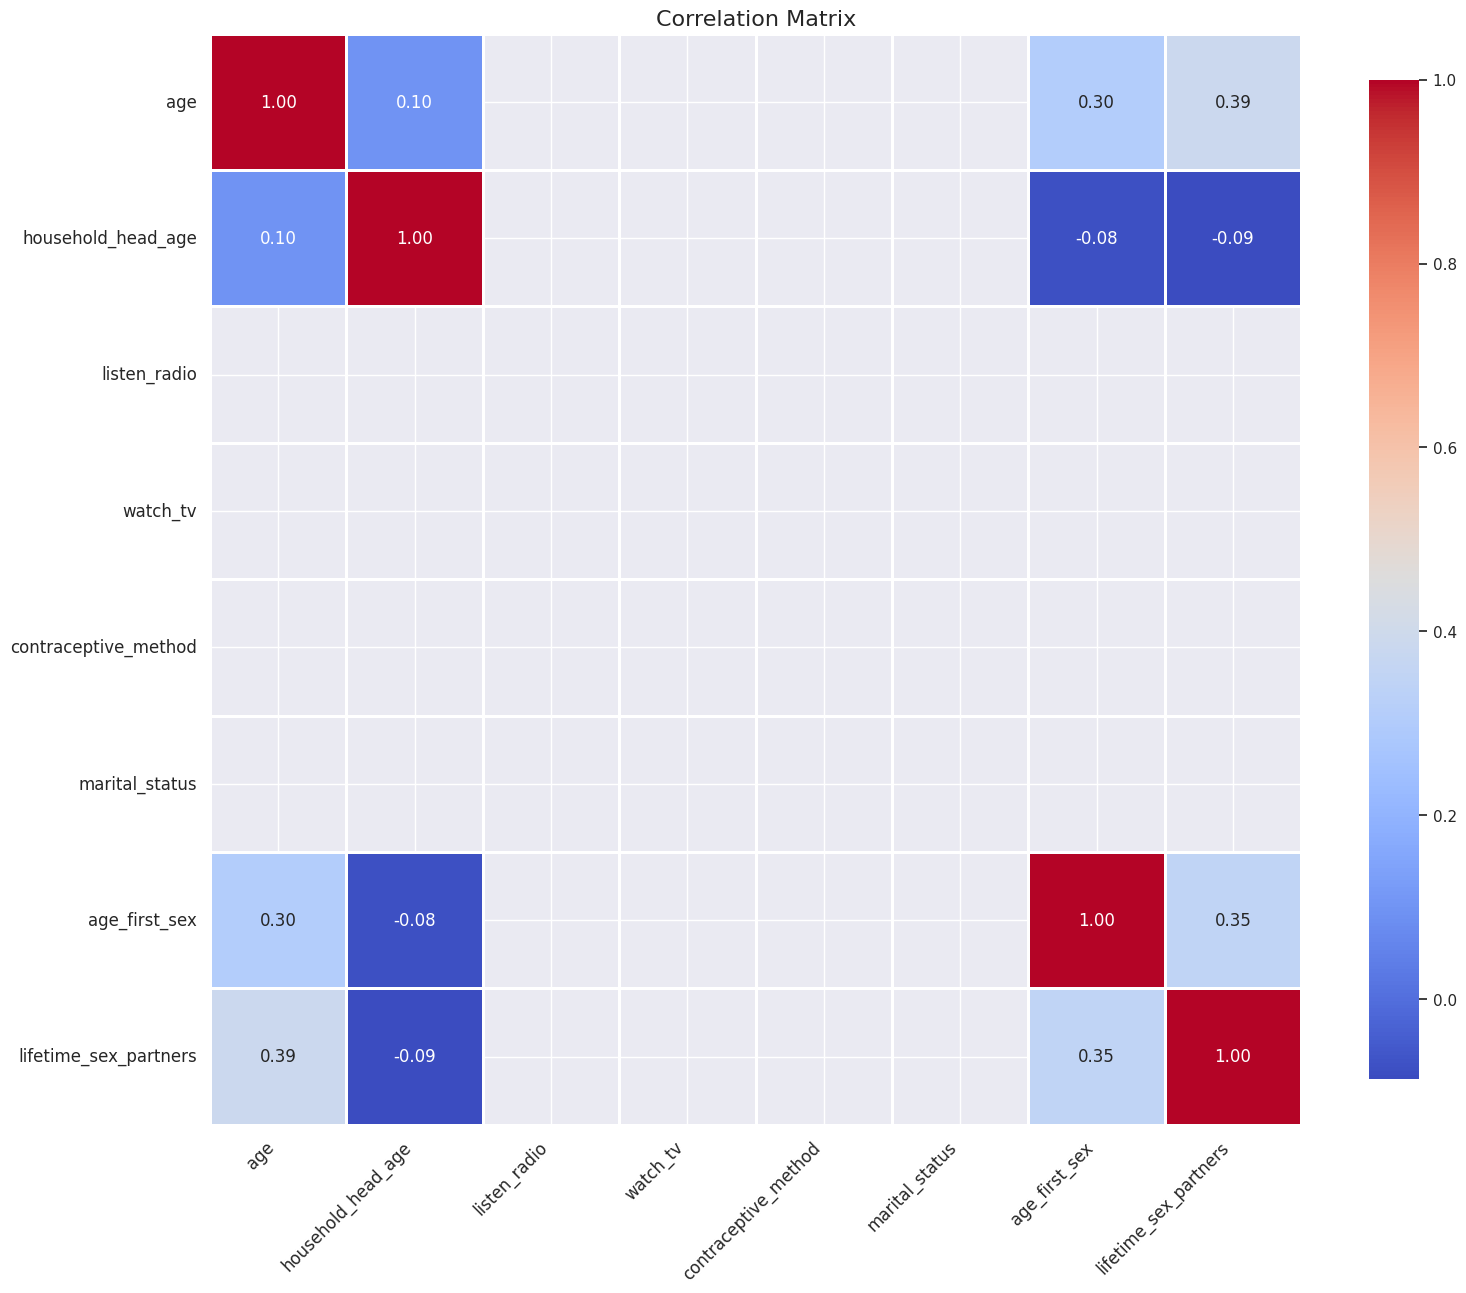

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features
numeric_features = df_selected.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_features.corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(16, 14))  # Increased figure size
sns.set(font_scale=1)       # Increase font scale for better readability
sns.heatmap(
    corr_matrix,
    annot=True,                # Show correlation values
    fmt=".2f",                 # Format
    cmap="coolwarm",           # Color map
    linewidths=1,              # Line width between cells
    cbar_kws={'shrink': 0.8}, # Colorbar size
    square=True
)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()


In [145]:
df_selec=df_selected.drop(['residence','breast_exam'],axis=1)

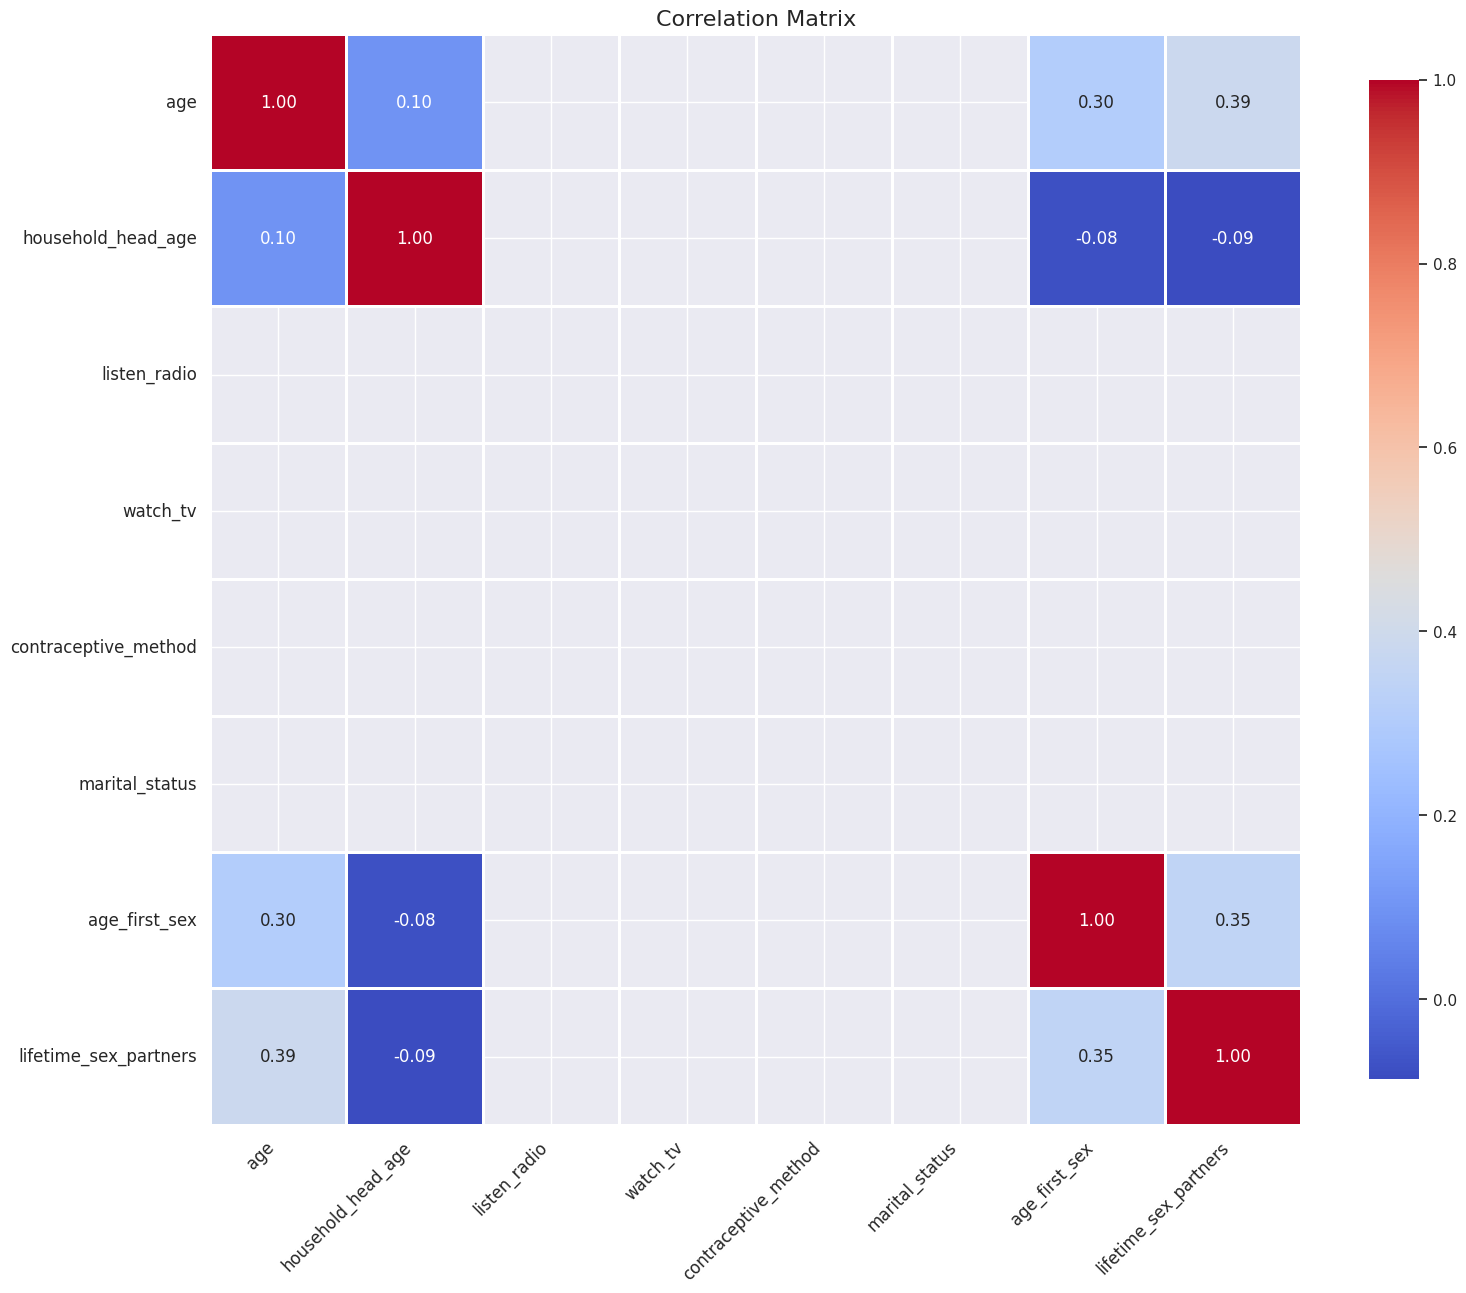

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features
numeric_features = df_selec.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_features.corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(16, 14))  # Increased figure size
sns.set(font_scale=1)       # Increase font scale for better readability
sns.heatmap(
    corr_matrix,
    annot=True,                # Show correlation values
    fmt=".2f",                 # Format
    cmap="coolwarm",           # Color map
    linewidths=1,              # Line width between cells
    cbar_kws={'shrink': 0.8}, # Colorbar size
    square=True
)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()


In [147]:
from sklearn.model_selection import train_test_split

# Assuming X contains features and y contains the target
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% for testing
    random_state=42,     # for reproducibility
    stratify=y           # keeps class distribution same in train and test
)

# Check the shape
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())


X_train: (11127, 21)
X_test: (2782, 21)
y_train distribution:
 cervical_cancer_screened
0    8183
1    2944
Name: count, dtype: int64
y_test distribution:
 cervical_cancer_screened
0    2046
1     736
Name: count, dtype: int64


In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import pandas as pd

# ensure using training set only
y_train_mapped = y_train.map({0: "No", 1: "Yes"})

# Apply SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

y_train_res_mapped = pd.Series(y_train_res).map({0: "No", 1: "Yes"})

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
order = ["No", "Yes"]  # explicit category order used for both plots

# Before SMOTE
sns.countplot(x=y_train_mapped, order=order, palette="Set2", ax=axes[0])
axes[0].set_title("Before SMOTE", fontsize=14)
axes[0].set_xlabel("Cervical Cancer Screened", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)

# Annotate counts by reading bar heights (robust)
for p in axes[0].patches:
    height = int(p.get_height())
    axes[0].text(p.get_x() + p.get_width() / 2., height + 5, str(height),
                 ha="center", fontsize=12)

# After SMOTE
sns.countplot(x=y_train_res_mapped, order=order, palette="Set2", ax=axes[1])
axes[1].set_title("After SMOTE", fontsize=14)
axes[1].set_xlabel("Cervical Cancer Screened", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)

for p in axes[1].patches:
    height = int(p.get_height())
    axes[1].text(p.get_x() + p.get_width() / 2., height + 5, str(height),
                 ha="center", fontsize=12)

plt.tight_layout()
plt.show()


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# 1. Initialize Random Forest
# ---------------------------
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight=None  # SMOTE already used
)

# ---------------------------
# 2. Apply RFE on the resampled training data
# ---------------------------
# Select how many top features to keep (optional)
n_features_to_select = 12  # You can change this

rfe = RFE(
    estimator=rf,
    n_features_to_select=n_features_to_select,
    step=1
)

rfe.fit(X_train_res, y_train_res)

# ---------------------------
# 3. Extract ranking results
# ---------------------------
ranking_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Rank": rfe.ranking_,
    "Selected": rfe.support_
}).sort_values(by="Rank")

print("Feature Ranking (1 = most important):")
print(ranking_df)

# ---------------------------
# 4. High-Quality Plot
# ---------------------------

plt.figure(figsize=(10, 12))

# Sort features by rank
sorted_df = ranking_df.sort_values("Rank")

bars = plt.barh(sorted_df["Feature"], sorted_df["Rank"],
                edgecolor="black", linewidth=1.2)

# Color bars: selected features = dark, others = light
for i, bar in enumerate(bars):
    if sorted_df["Selected"].iloc[i]:
        bar.set_color("#2b83ba")     # strong color
   # else:
        #bar.set_color("#d8e5eb")     # light color

plt.gca().invert_yaxis()
plt.title("Feature Ranking using RFE with Random Forest",
          fontsize=20, fontweight="bold")
plt.xlabel("Rank (1 = Best)", fontsize=16)
plt.ylabel("Features", fontsize=16)

plt.grid(axis='x', linestyle="--", alpha=0.5)
plt.box(False)

plt.tight_layout()
plt.show()

# Show only top-ranked (rank = 1) features
print("\nTop Selected Features:")
print(ranking_df[ranking_df["Rank"] == 1])


In [ ]:
!pip install optuna

In [ ]:
!pip install catboost

In [ ]:
# Full pipeline: Optuna + train final models + evaluation + ROC plot
# Run this after your RFE code (ranking_df exists and RFE-selected features are known)

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ML & optimization libs
import optuna
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metrics
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    confusion_matrix,
    classification_report
)

# ---------------------------
# 0. Prepare selected feature datasets
# ---------------------------
selected_features = ranking_df[ranking_df["Selected"] == True]["Feature"].tolist()
print("Selected features (RFE):", selected_features)

X_train_sel = X_train_res[selected_features].copy()
X_test_sel  = X_test[selected_features].copy()

# quick check
assert X_train_sel.shape[1] == len(selected_features)

# ---------------------------
# Helper: evaluation function
# ---------------------------
def evaluate_model(name, model, X_test, y_test):
    probs = None
    try:
        probs = model.predict_proba(X_test)[:, 1]
    except Exception:
        # For models without predict_proba (rare), use decision_function then min-max scale
        try:
            scores = model.decision_function(X_test)
            probs = (scores - scores.min()) / (scores.max() - scores.min())
        except Exception:
            probs = model.predict(X_test)  # fallback to hard preds

    preds = (probs >= 0.5).astype(int) if probs.ndim == 1 else (probs >= 0.5).astype(int)
    roc_auc = roc_auc_score(y_test, probs)
    pr_auc  = average_precision_score(y_test, probs)
    acc     = accuracy_score(y_test, preds)
    prec    = precision_score(y_test, preds, zero_division=0)
    rec     = recall_score(y_test, preds, zero_division=0)
    f1      = f1_score(y_test, preds, zero_division=0)
    cm      = confusion_matrix(y_test, preds)

    return {
        "model": name,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "confusion_matrix": cm,
        "probs": probs
    }

# ---------------------------
# 1. Define Optuna objective functions
# Each objective trains on X_train_sel / y_train_res and returns test ROC-AUC
# ---------------------------

def optimize_logistic(trial):
    C = trial.suggest_float("C", 1e-4, 100.0, log=True)
    penalty = trial.suggest_categorical("penalty", ["l2"])  # l1 can require solver change
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("lr", LogisticRegression(C=C, penalty=penalty, max_iter=5000, solver="lbfgs"))
    ])
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_rf(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 600)
    max_depth = trial.suggest_int("max_depth", 3, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", 0.5, None])
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        max_features=max_features,
        n_jobs=-1,
        random_state=42
    )
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_xgb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 800),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "use_label_encoder": False,
        "eval_metric": "logloss",
        "random_state": 42,
        "n_jobs": -1
    }
    model = XGBClassifier(**params)
    model.fit(X_train_sel, y_train_res, verbose=False)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_lgbm(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 800),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "n_jobs": -1,
        "random_state": 42
    }
    model = LGBMClassifier(**params)
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_cat(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 200, 1000),
        "depth": trial.suggest_int("depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "random_state": 42,
        "verbose": 0
    }
    model = CatBoostClassifier(**params)
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_svm(trial):
    C = trial.suggest_float("C", 0.01, 100.0, log=True)
    gamma = trial.suggest_categorical("gamma", ["scale", "auto"])
    kernel = trial.suggest_categorical("kernel", ["rbf"])  # rbf most common for non-linear
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(C=C, kernel=kernel, gamma=gamma, probability=True))
    ])
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)

# ---------------------------
# 2. Run Optuna studies for each model
# Set n_trials according to your compute: 30-60 recommended
# ---------------------------
n_trials = 40

def run_search(func, name, n_trials=n_trials):
    print(f"\nStarting optimization for {name} ({n_trials} trials)...")
    study = optuna.create_study(direction="maximize")
    study.optimize(func, n_trials=n_trials, show_progress_bar=True)
    print(f"Best {name} ROC-AUC: {study.best_value:.4f}")
    print(f"Best {name} params: {study.best_params}")
    return study.best_params

best_lr_params   = run_search(optimize_logistic, "Logistic Regression")
best_rf_params   = run_search(optimize_rf, "Random Forest")
best_xgb_params  = run_search(optimize_xgb, "XGBoost")
best_lgbm_params = run_search(optimize_lgbm, "LightGBM")
best_cat_params  = run_search(optimize_cat, "CatBoost")
best_svm_params  = run_search(optimize_svm, "SVM")

# ---------------------------
# 3. Train final models with best params
# ---------------------------
print("\nTraining final models with best parameters...")

final_models = {}

# Logistic Regression final
final_models["LogisticRegression"] = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(C=best_lr_params["C"], max_iter=5000, solver="lbfgs"))
])
final_models["LogisticRegression"].fit(X_train_sel, y_train_res)

# Random Forest final
final_models["RandomForest"] = RandomForestClassifier(
    n_estimators=best_rf_params.get("n_estimators", 200),
    max_depth=best_rf_params.get("max_depth", None),
    min_samples_split=best_rf_params.get("min_samples_split", 2),
    max_features=best_rf_params.get("max_features", None),
    n_jobs=-1,
    random_state=42
)
final_models["RandomForest"].fit(X_train_sel, y_train_res)

# XGBoost final
xgb_params = best_xgb_params.copy()
xgb_params.update({"use_label_encoder": False, "eval_metric": "logloss", "random_state": 42, "n_jobs": -1})
final_models["XGBoost"] = XGBClassifier(**xgb_params)
final_models["XGBoost"].fit(X_train_sel, y_train_res, verbose=False)

# LightGBM final
lgbm_params = best_lgbm_params.copy()
lgbm_params.update({"random_state": 42, "n_jobs": -1})
final_models["LightGBM"] = LGBMClassifier(**lgbm_params)
final_models["LightGBM"].fit(X_train_sel, y_train_res)

# CatBoost final
cat_params = best_cat_params.copy()
cat_params.update({"random_state": 42, "verbose": 0})
final_models["CatBoost"] = CatBoostClassifier(**cat_params)
final_models["CatBoost"].fit(X_train_sel, y_train_res)

# SVM final
final_models["SVM"] = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(C=best_svm_params.get("C", 1.0), kernel=best_svm_params.get("kernel", "rbf"),
                gamma=best_svm_params.get("gamma", "scale"), probability=True))
])
final_models["SVM"].fit(X_train_sel, y_train_res)

# ---------------------------
# 4. Evaluate final models on test set
# ---------------------------
results = []
plt.figure(figsize=(10, 8))

for name, model in final_models.items():
    res = evaluate_model(name, model, X_test_sel, y_test)
    results.append(res)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, res["probs"])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {res['roc_auc']:.3f})")

# Random baseline
plt.plot([0,1], [0,1], "k--", label="Random")
plt.title("ROC Curves - Final Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------
# 5. Results summary table
# ---------------------------
summary = pd.DataFrame([{
    "Model": r["model"],
    "ROC_AUC": r["roc_auc"],
    "PR_AUC": r["pr_auc"],
    "Accuracy": r["accuracy"],
    "Precision": r["precision"],
    "Recall": r["recall"],
    "F1": r["f1"]
} for r in results]).sort_values("ROC_AUC", ascending=False).reset_index(drop=True)

print("\nModel performance summary (sorted by ROC_AUC):")
print(summary)

# Show confusion matrices + classification reports for top 2 models
top_models = summary["Model"].iloc[:2].tolist()
for tm in top_models:
    print(f"\n--- Confusion Matrix & Classification report: {tm} ---")
    model_obj = final_models[tm]
    # get preds
    try:
        probs = model_obj.predict_proba(X_test_sel)[:, 1]
        preds = (probs >= 0.5).astype(int)
    except Exception:
        preds = model_obj.predict(X_test_sel)
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds, zero_division=0))

# Optionally save summary
summary.to_csv("model_performance_summary.csv", index=False)
print("\nSaved performance summary to model_performance_summary.csv")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12, 10), dpi=150)  # High resolution

# Colors and line styles for each model
colors = {
    "LogisticRegression": "#1f77b4",
    "RandomForest": "#ff7f0e",
    "XGBoost": "#2ca02c",
    "LightGBM": "#d62728",
    "CatBoost": "#9467bd",
    "SVM": "#8c564b"
}
linestyles = {
    "LogisticRegression": "-",
    "RandomForest": "--",
    "XGBoost": "-.",
    "LightGBM": ":",
    "CatBoost": (0, (3, 1, 1, 1)),  # custom dash
    "SVM": (0, (5, 1))              # custom dash
}

for name, model in final_models.items():
    # Get probabilities
    try:
        probs = model.predict_proba(X_test_sel)[:, 1]
    except Exception:
        scores = model.decision_function(X_test_sel)
        probs = (scores - scores.min()) / (scores.max() - scores.min())

    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # Plot with distinct line style + color
    plt.plot(fpr, tpr, lw=3, color=colors.get(name, "black"),
             linestyle=linestyles.get(name, "-"),
             label=f"{name} (AUC = {roc_auc:.3f})")

    # Optional: fill under curve lightly
    plt.fill_between(fpr, 0, tpr, alpha=0.05, color=colors.get(name, "black"))

# Plot random chance
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Chance')

# Formatting
plt.title("ROC Curves - Final Models", fontsize=22, fontweight='bold')
plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()

# Save high-res image
plt.savefig("ROC_Curves_HighQuality_Improved.png", dpi=300)
plt.show()


High-quality bar plot of TOPSIS **scores**

In [ ]:
!pip install topsis


In [ ]:
import pandas as pd
import numpy as np

# ---------------------------
# 1. Prepare performance table
# ---------------------------
performance_df = pd.DataFrame([{
    "Model": r["model"],
    "ROC_AUC": r["roc_auc"],
    "PR_AUC": r["pr_auc"],
    "Accuracy": r["accuracy"],
    "Precision": r["precision"],
    "Recall": r["recall"],
    "F1": r["f1"]
} for r in results])

performance_df.set_index("Model", inplace=True)

# ---------------------------
# 2. TOPSIS Implementation
# ---------------------------
# Step 1: Normalize the decision matrix
matrix = performance_df.values
norm_matrix = matrix / np.sqrt((matrix**2).sum(axis=0))

# Step 2: Define weights (sum to 1)
weights = np.array([0.25, 0.15, 0.2, 0.1, 0.1, 0.2])
weighted_matrix = norm_matrix * weights

# Step 3: Determine ideal best and worst (all metrics are benefit)
ideal_best = weighted_matrix.max(axis=0)
ideal_worst = weighted_matrix.min(axis=0)

# Step 4: Calculate distance to ideal best and worst
dist_best = np.sqrt(((weighted_matrix - ideal_best)**2).sum(axis=1))
dist_worst = np.sqrt(((weighted_matrix - ideal_worst)**2).sum(axis=1))

# Step 5: Compute TOPSIS score
performance_df['TOPSIS_score'] = dist_worst / (dist_best + dist_worst)
performance_df['Rank'] = performance_df['TOPSIS_score'].rank(ascending=False).astype(int)

# Sort by rank
performance_df = performance_df.sort_values('Rank')

print("TOPSIS ranking of models:")
print(performance_df[['TOPSIS_score', 'Rank']])


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6), dpi=150)
bars = plt.barh(performance_df.index, performance_df['TOPSIS_score'], color="#2b83ba", edgecolor="black")
plt.xlabel("TOPSIS Score", fontsize=16)
plt.ylabel("Models", fontsize=16)
plt.title("Model Ranking Using TOPSIS", fontsize=20, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Annotate score on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2,
             f"{width:.3f}", va='center', fontsize=12)

plt.tight_layout()
plt.show()


Radar plot of metrics + TOPSIS ranking

In [ ]:
from math import pi

# Metrics for radar
metrics = ["ROC_AUC", "PR_AUC", "Accuracy", "Precision", "Recall", "F1"]
num_metrics = len(metrics)

# Angle for each axis
angles = [n / float(num_metrics) * 2 * pi for n in range(num_metrics)]
angles += angles[:1]  # complete circle

plt.figure(figsize=(8,8), dpi=150)
ax = plt.subplot(111, polar=True)

# Plot each model
for idx, row in performance_df.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # complete circle
    ax.plot(angles, values, linewidth=2, label=f"{idx} (Rank {row['Rank']})")
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], metrics, fontsize=12)
plt.yticks(fontsize=10)
plt.title("Model Performance Radar + TOPSIS Ranking", fontsize=18, fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.05))
plt.show()


In [ ]:
import shap
import matplotlib.pyplot as plt

# Ensure X_train_sel and X_test_sel only have selected features
# Example: X_train_sel = X_train_res[selected_features]
#          X_test_sel  = X_test[selected_features]

# Top 3 models based on TOPSIS ranking
top_models = ['XGBoost', 'CatBoost', 'LightGBM']

for model_name in top_models:
    model = final_models[model_name]

    # ---------------------------
    # 1. Choose SHAP explainer
    # ---------------------------
    if model_name in ['XGBoost']:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test_sel)
    elif model_name == 'LogisticRegression':
        explainer = shap.LinearExplainer(model, X_train_sel)
        shap_values = explainer.shap_values(X_test_sel)
    else:
        print(f"Skipping SHAP for {model_name}")
        continue

    # ---------------------------
    # 2. Bar Plot - Feature Importance
    # ---------------------------
    plt.figure(figsize=(12, 8), dpi=150)
    shap.summary_plot(shap_values, X_test_sel, plot_type="bar", show=False)
    plt.title(f"SHAP Feature Importance (Bar) - {model_name}", fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f"SHAP_Bar_{model_name}_SelectedFeatures.png", dpi=300)
    plt.show()

    # ---------------------------
    # 3. Dot Plot - Feature Effects
    # ---------------------------
    plt.figure(figsize=(12, 10), dpi=150)
    shap.summary_plot(shap_values, X_test_sel, plot_type="dot", show=False)
    plt.title(f"SHAP Summary Plot (Dot) - {model_name}", fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f"SHAP_Dot_{model_name}_SelectedFeatures.png", dpi=300)
    plt.show()
